**Attempted 4f simulation with dLux**

    See notes in "Fourf_optical_system_simulation_v1.ipynb" for the mathematics and background derivation.

In [1]:
# required imports
import jax.numpy as np 
import jax.random as jr
import jax.scipy as jsp
from jax import vmap

import zodiax as zdx 
import optax

import dLux as dl 
import dLux.utils as dlu
import dLux.layers as dll

from tqdm.notebook import tqdm
import matplotlib.pyplot as plt


In [2]:
# Establishing light source
wvl = 2e-7
wf_pix = 512
diameter = 1

lightWave = dl.Wavefront(wavelength=wvl, npixels=wf_pix, diameter=2000*diameter)


Optic(opd=None, phase=None, transmission=f32[512,512], normalise=True)
<class 'jaxlib.xla_extension.ArrayImpl'>


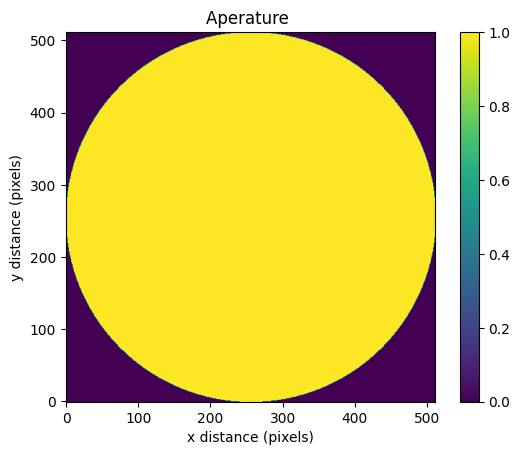

In [3]:
# Establishing light source
coords = dlu.pixel_coords(wf_pix, diameter)
aperature = dlu.circle(coords, 0.5*diameter)

# Creating the first lens

lens1 = dll.Optic(transmission = aperature, normalise = True)
print(lens1)
plt.imshow(lens1.transmission, origin='lower')
plt.title("Aperature ")
plt.xlabel("x distance (pixels)")
plt.ylabel("y distance (pixels)")
print(type(lens1.transmission))
plt.colorbar()

Wavefront(
  wavelength=f32[],
  pixel_scale=0.05,
  amplitude=f32[100,100],
  phase=f32[100,100],
  plane='Intermediate',
  units='Cartesian'
)


[]

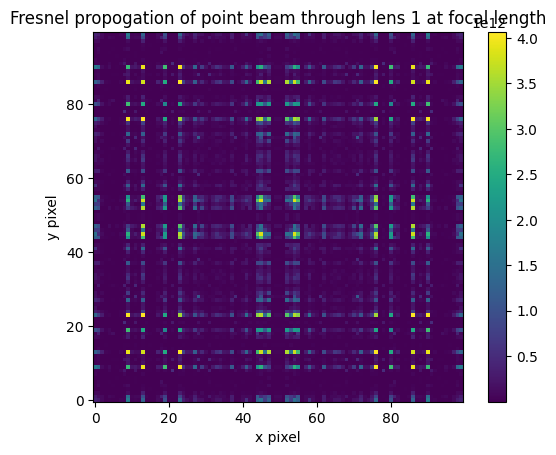

In [6]:
psf_pix = 100
psf_pixel_scale = 50e-3
focal_length = 0.9
focal_shift = 0

# attempting to propagate through first lens using various methods. All produced errors or the square-pattern seen below.

lensApp = lens1.apply(lightWave)
#plt.imshow(lensApp.psf, origin='lower')
propVal = lensApp.propagate_fresnel(npixels=psf_pix, pixel_scale=psf_pixel_scale, focal_length=focal_length)
#propVal = lensApp.propagate(npixels=512, pixel_scale=psf_pixel_scale)
#propVal = lightWave.propagate_FFT(focal_length=focal_length)
#propVal = lensApp.propagate(npixels=psf_pix, pixel_scale=psf_pixel_scale)
print(propVal)
plt.imshow(propVal.psf, origin='lower')
plt.colorbar()
plt.title("Fresnel propogation of point beam through lens 1 at focal length")
plt.xlabel("x pixel")
plt.ylabel("y pixel")

intensity = np.abs(propVal.psf)**2
plt.plot()

Wavefront(
  wavelength=f32[],
  pixel_scale=f32[],
  amplitude=f32[1024,1024],
  phase=f32[1024,1024],
  plane='Focal',
  units='Cartesian'
)


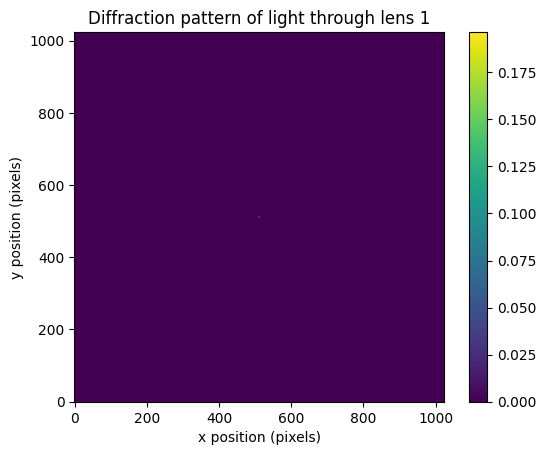

In [7]:
# continuation of attempt at using dLux.

psf_pix = 100
psf_pixel_scale = 50e-3
focal_length = 0.9
focal_shift = 0

#prop = dll.FarFieldFresnel(npixels=psf_pix, pixel_scale=psf_pixel_scale, focal_length=focal_length, focal_shift=focal_shift)
prop = dll.FFT(focal_length=focal_length)
u1 = prop.apply(lensApp).normalise()
plt.imshow(u1.psf, origin = 'lower')
plt.title("Diffraction pattern of light through lens 1")
plt.xlabel("x position (pixels)")
plt.ylabel("y position (pixels)")
plt.colorbar()
print(u1)